In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import pickle 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,SimpleRNN

In [2]:
df = pd.read_csv('clean_data.csv',index_col=0)
df.head()

,clean_text,label
0,oily creamy expected ordered try highlight con...,0
1,palette decent price looking different shades ...,0
2,texture concealer pallet fantastic great cover...,0
3,really tell exactly thing powder kind oil ish ...,0
4,little smaller expected okay lasted long time ...,0


In [3]:
df['clean_text'] = df['clean_text'].apply(lambda x:str(x))

In [4]:
x = df['clean_text']
y = df['label']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

## Tokenization

In [6]:
tok = Tokenizer(oov_token = '<UNK>')

In [7]:
# we fit only on training data and just transform that on testing data

In [8]:
#fitting on training data
tok.fit_on_texts(x_train)

In [9]:
len(tok.word_index)

92705

In [10]:
# just transforming the test data
train_sequences = tok.texts_to_sequences(x_train)
test_sequences = tok.texts_to_sequences(x_test)

In [11]:
with open('filename.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Padding

(array([77860., 78817., 41276., 23841., 14107.,  8816.,  5736.,  3758.,
         2619.,  1945.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

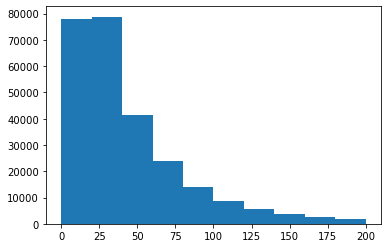

In [12]:
plt.hist(df['clean_text'].apply(lambda x:len(x.split())),range = (0,200))

In [13]:
x_train = pad_sequences(train_sequences,maxlen=100,padding='pre',truncating='pre')
x_test = pad_sequences(test_sequences,maxlen=100,padding='pre',truncating='pre')

## Model Fitting

In [14]:
model = Sequential([
    Embedding(92706,300),
    SimpleRNN(128),
    Dense(100,activation='relu'),
    Dense(6,activation='softmax')  
    
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         27811800  
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               54912     
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 27,880,218
Trainable params: 27,880,218
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss= 'SparseCategoricalCrossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,batch_size=500,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
371/371 [==============================] - 160s 428ms/step - loss: 0.6245 - accuracy: 0.7608 - val_loss: 0.3240 - val_accuracy: 0.9072
Epoch 2/10
371/371 [==============================] - 145s 392ms/step - loss: 0.3742 - accuracy: 0.8800 - val_loss: 0.3069 - val_accuracy: 0.9038
Epoch 3/10
371/371 [==============================] - 151s 406ms/step - loss: 0.3707 - accuracy: 0.8837 - val_loss: 0.3223 - val_accuracy: 0.9040
Epoch 4/10
371/371 [==============================] - 152s 409ms/step - loss: 0.3182 - accuracy: 0.8963 - val_loss: 0.3085 - val_accuracy: 0.9095
Epoch 5/10
371/371 [==============================] - 1644s 4s/step - loss: 0.5424 - accuracy: 0.8103 - val_loss: 0.4003 - val_accuracy: 0.8748
Epoch 6/10
371/371 [==============================] - 170s 458ms/step - loss: 0.3820 - accuracy: 0.8751 - val_loss: 0.3995 - val_accuracy: 0.8770
Epoch 7/10
371/371 [==============================] - 161s 434ms/step - loss: 0.2834 - accuracy: 0.9150 - val_loss: 0.3453 - v

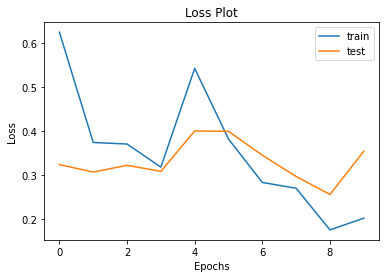

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend(['train','test'])

In [19]:
model.save('RNN_Model.h5')